In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


# Define dataset path
dataset_path = "nigfoodai"

# Dictionary to store image file paths
food_images = {}

# Iterate through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        food_images[class_name] = []  # Initialize list for storing image paths
        
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            
            if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  
                food_images[class_name].append(file_path)  # Store the file path


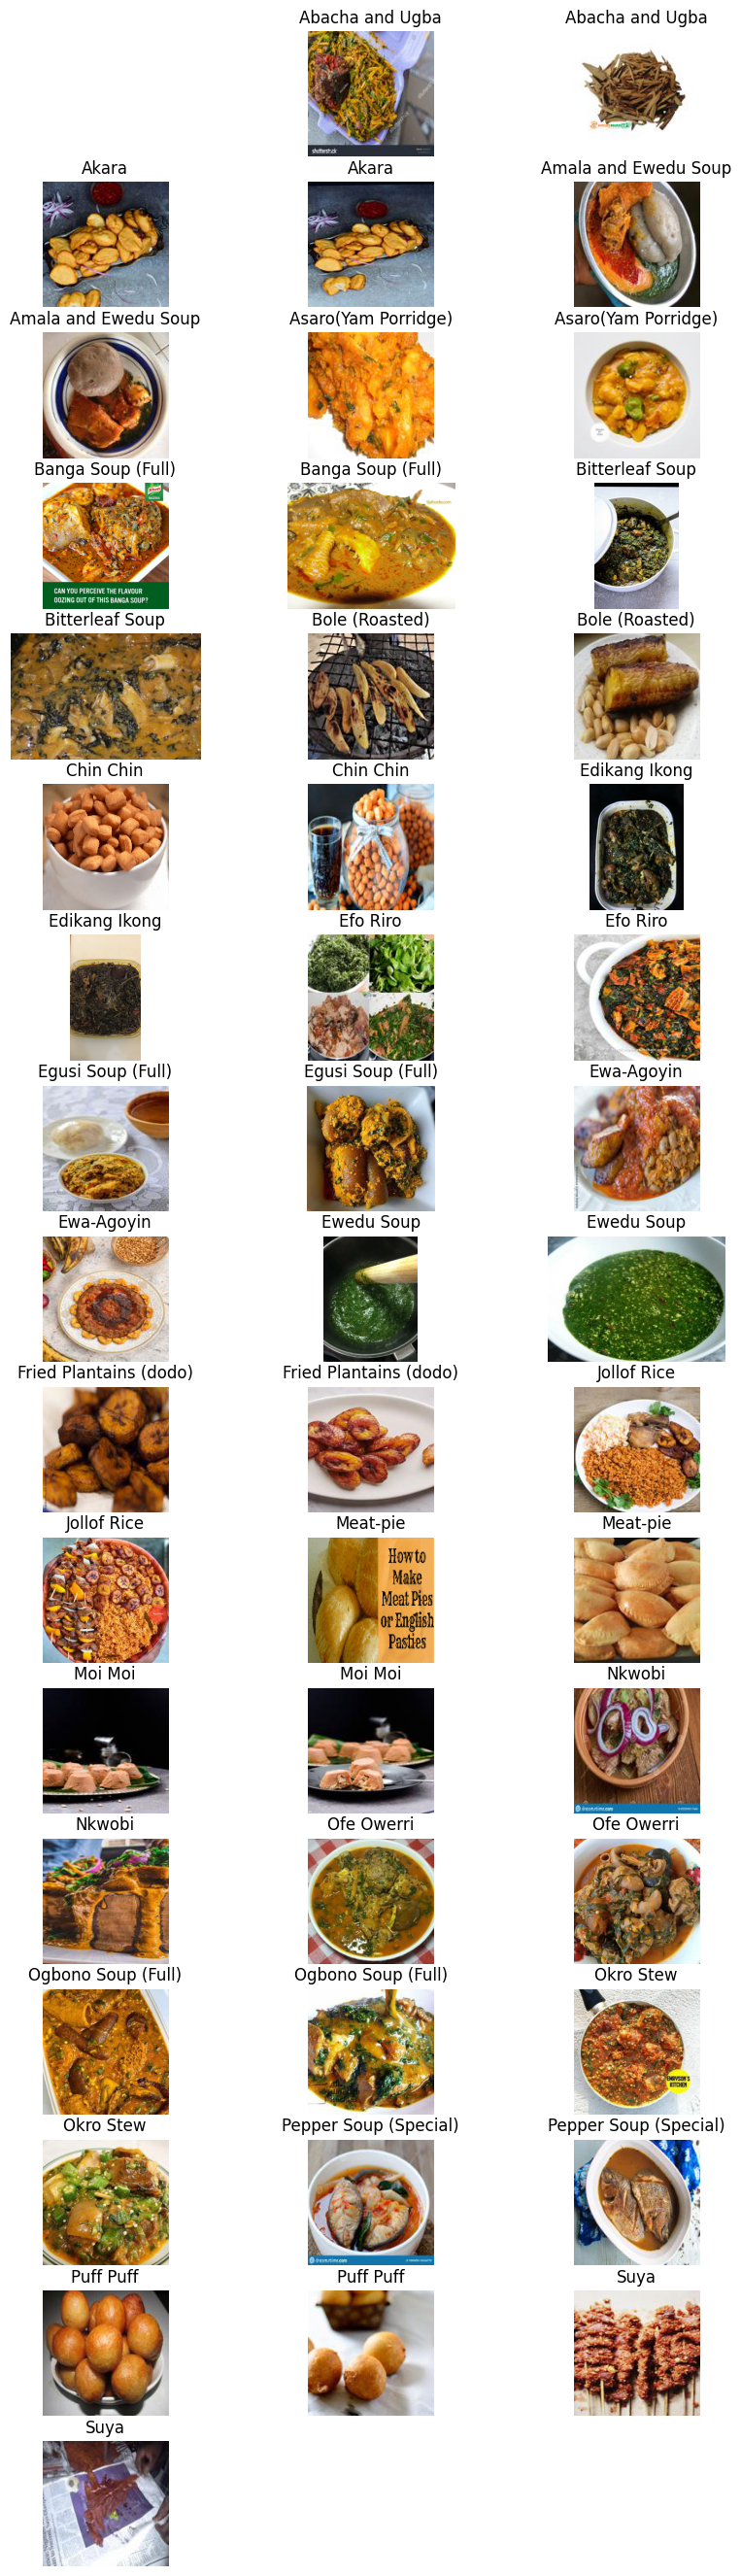

In [2]:
# Display images only if valid data exists
def visualize_images(food_images, num_examples=2):
    num_classes = len(food_images.keys())
    total_images = min(num_classes * num_examples, 50)  # Limit total images for display
    plt.figure(figsize=(10, num_classes * 2))
    
    i = 1
    for food_class, image_paths in food_images.items():
        if len(image_paths) >= num_examples:  # Ensure we have enough images
            for img_path in image_paths[:num_examples]:  # Take first 2 images
                img = Image.open(img_path).convert("RGB")  # Load image
                plt.subplot(num_classes, 3, i+1)
                plt.imshow(img)
                plt.title(food_class)
                plt.axis("off")
                i += 1
                if i > total_images:
                    break
        if i > total_images:
            break

    plt.show()

visualize_images(food_images, num_examples=2)

In [3]:
metadata = pd.read_csv("Nigerian Foods.csv")
metadata.head()

,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,Abacha,"African salad, utazi leaves, oil, fish",Cassava-based salad with spicy fish,Healthy,Traditional,South-East,Spicy,Affordable
1,Abacha and Ugba (Regular),"Abacha (Cassava Fufu), Ugba (Oilbean Seeds)",Shredded cassava fufu served with oilbean seeds.,Healthy,Traditional,Eastern,NaN,Affordable
2,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
3,Afang Soup (Spicy),"Afang Leaves, Water yam, Seafood","Spicy soup made with afang leaves, water yam, ...",Healthy,Traditional,Southern,Spicy,Affordable
4,Afang Soup,"Afang leaves, waterleaf, meat, fish",Nutritious soup made with wild spinach and wat...,Healthy,Traditional,South-South,Mild,Affordable


In [4]:
#Merge Image Paths with Metadata
combined_data = []

for class_name, images in food_images.items():
    class_metadata = metadata[metadata['Food_Name'] == class_name]  # Get metadata for class

    if not class_metadata.empty:
        for img_path in images:  # Now, img_path is a file path string
            combined_data.append({
                'Image_Path': img_path,  # Store file path instead of image array
                **class_metadata.iloc[0].to_dict()  # Merge all metadata fields
            })

# ✅ Convert to DataFrame
combined_df = pd.DataFrame(combined_data)
combined_df.head()

,Image_Path,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,nigfoodai\Abacha and Ugba\-african-salad-abach...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
1,nigfoodai\Abacha and Ugba\1638431539842.jpg,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
2,nigfoodai\Abacha and Ugba\16dc129e234cac02fdc5...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
3,nigfoodai\Abacha and Ugba\2-1.jpg,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
4,nigfoodai\Abacha and Ugba\21276543809_b180cbd2...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable


In [5]:
combined_df.shape

(8969, 9)

In [6]:
food_counts = combined_df['Food_Name'].value_counts()
food_counts

Food_Name
Egusi Soup (Full)        973
Jollof Rice              939
Ogbono Soup (Full)       621
Okro Stew                549
Pepper Soup (Special)    541
Amala and Ewedu Soup     530
Moi Moi                  528
Efo Riro                 479
Suya                     458
Akara                    432
Puff Puff                382
Asaro(Yam Porridge)      376
Nkwobi                   371
Chin Chin                333
Meat-pie                 319
Bole (Roasted)           292
Abacha and Ugba          243
Ewa-Agoyin               239
Edikang Ikong            106
Ewedu Soup               102
Ofe Owerri                58
Bitterleaf Soup           49
Banga Soup (Full)         49
Name: count, dtype: int64

In [7]:
combined_df['Food_Name'].nunique()

23

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8969 entries, 0 to 8968
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Image_Path        8969 non-null   object
 1   Food_Name         8969 non-null   object
 2   Main_Ingredients  8969 non-null   object
 3   Description       8969 non-null   object
 4   Food_Health       8969 non-null   object
 5   Food_Class        8969 non-null   object
 6   Region            8969 non-null   object
 7   Spice_Level       7643 non-null   object
 8   Price_Range       8969 non-null   object
dtypes: object(9)
memory usage: 630.8+ KB


In [9]:
combined_df['Spice_Level'].unique()

array(['Spicy', 'Mild', nan, 'Medium'], dtype=object)

In [10]:
missing_spice = combined_df[combined_df['Spice_Level'].isna()]
missing_spice.shape

(1326, 9)

In [11]:
missing_spice['Food_Name'].unique()

array(['Bole (Roasted)', 'Chin Chin', 'Meat-pie', 'Puff Puff'],
      dtype=object)

In [12]:
missing_spice[missing_spice['Food_Name'] == 'Bole (Roasted)']['Main_Ingredients'].unique()

array(['Plantains'], dtype=object)

In [13]:
missing_spice[missing_spice['Food_Name'] == 'Chin Chin']['Main_Ingredients'].unique()

array(['Flour, Milk, Sugar'], dtype=object)

In [14]:
missing_spice[missing_spice['Food_Name'] == 'Puff Puff']['Main_Ingredients'].unique()

array(['Flour, Yeast, Sugar, Eggs'], dtype=object)

In [15]:
#since the main ingredients for Bole, chin chin, and puff puff doesn't include pepper, I'll be filling the Spice_Level with None
#['Bole (Roasted)', 'Chin Chin', 'Puff Puff']
combined_df.fillna(' None', inplace= True)

In [16]:
combined_df.isna().sum()

Image_Path          0
Food_Name           0
Main_Ingredients    0
Description         0
Food_Health         0
Food_Class          0
Region              0
Spice_Level         0
Price_Range         0
dtype: int64

In [17]:
combined_df['Food_Health'].unique()

array(['Healthy', 'Moderately Healthy', 'Non-Healthy'], dtype=object)

In [18]:
combined_df['Food_Health'].value_counts()

Food_Health
Healthy               5637
Moderately Healthy    2298
Non-Healthy           1034
Name: count, dtype: int64

In [19]:
combined_df['Region'].value_counts()

Region
South-West     2699
South-East     2419
Nationwide     1867
West            939
North           458
South           432
South-South     155
Name: count, dtype: int64

In [20]:
combined_df[combined_df['Region'] == 'South-West']['Food_Name'].unique()

array(['Amala and Ewedu Soup', 'Asaro(Yam Porridge)', 'Efo Riro',
       'Egusi Soup (Full)', 'Ewa-Agoyin', 'Ewedu Soup'], dtype=object)

In [21]:
combined_df[combined_df['Region'] == 'West']['Food_Name'].unique() #should be nationwide

array(['Jollof Rice'], dtype=object)

In [22]:
combined_df[combined_df['Region'] == 'South']['Food_Name'].unique()

array(['Akara'], dtype=object)

In [23]:
combined_df[combined_df['Region'] == 'South-South']['Food_Name'].unique()

array(['Banga Soup (Full)', 'Edikang Ikong'], dtype=object)

In [24]:
combined_df['Region'] = combined_df['Region'].replace({'West': 'Nationwide', 'South': 'South-West'})

In [25]:
combined_df['Region'].value_counts()

Region
South-West     3131
Nationwide     2806
South-East     2419
North           458
South-South     155
Name: count, dtype: int64

In [26]:
combined_df.head()

,Image_Path,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,nigfoodai\Abacha and Ugba\-african-salad-abach...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
1,nigfoodai\Abacha and Ugba\1638431539842.jpg,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
2,nigfoodai\Abacha and Ugba\16dc129e234cac02fdc5...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
3,nigfoodai\Abacha and Ugba\2-1.jpg,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
4,nigfoodai\Abacha and Ugba\21276543809_b180cbd2...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable


In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8969 entries, 0 to 8968
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Image_Path        8969 non-null   object
 1   Food_Name         8969 non-null   object
 2   Main_Ingredients  8969 non-null   object
 3   Description       8969 non-null   object
 4   Food_Health       8969 non-null   object
 5   Food_Class        8969 non-null   object
 6   Region            8969 non-null   object
 7   Spice_Level       8969 non-null   object
 8   Price_Range       8969 non-null   object
dtypes: object(9)
memory usage: 630.8+ KB


In [28]:
nja_data = combined_df[['Image_Path', 'Food_Name', 'Main_Ingredients', 'Description', 'Food_Health',	'Region']]
nja_data.head()

,Image_Path,Food_Name,Main_Ingredients,Description,Food_Health,Region
0,nigfoodai\Abacha and Ugba\-african-salad-abach...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,South-East
1,nigfoodai\Abacha and Ugba\1638431539842.jpg,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,South-East
2,nigfoodai\Abacha and Ugba\16dc129e234cac02fdc5...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,South-East
3,nigfoodai\Abacha and Ugba\2-1.jpg,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,South-East
4,nigfoodai\Abacha and Ugba\21276543809_b180cbd2...,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,South-East


In [29]:
nja_data.to_csv("Nigeria_Food_Data.csv", index=False)

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "nigfoodai"

food_images = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        food_images[class_name] = ['Abacha and Ugba', 'Akara', 'Amala and Ewedu Soup', 'Asaro(Yam Porridge)', 'Banga Soup (Full)', 'Bitterleaf Soup', 
                                   'Bole (Roasted)', 'Chin Chin', 'Edikang Ikong', 'Efo Riro', 'Egusi Soup (Full)', 'Ewa-Agoyin', 'Ewedu Soup', 
                                   'Jollof Rice', 'Meat-pie', 'Moi Moi', 'Nkwobi', 'Ofe Owerri', 'Ogbono Soup (Full)', 'Okra Soup', 'Okro Stew', 
                                   'Pepper Soup (Special)', 'Puff Puff', 'Suya']
      
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            
            if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  
                try:
                    with Image.open(file_path) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        img = img.resize((224, 224))  # Resize for consistency
                        img_array = np.array(img, dtype=np.uint8)  # Convert to NumPy array
                        food_images[class_name].append(img)  # Store image
                except Exception as e:
                    print(f"⚠️ Error loading {file_path}: {e}")

# 🚨 Remove any non-image data (if mistakenly stored)
for food, images in food_images.items():
    food_images[food] = [img for img in images if isinstance(img, np.ndarray)]

# ✅ Confirm Cleanup Worked
print("\n📌 Item Type Check:")
for food, images in food_images.items():
    if images:
        print(f"{food}: First item type -> {type(images[0])}")
        
print("\n📌 Classes and Image Counts:")
for food, images in food_images.items():
    print(f"{food}: {len(images)} images loaded")

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = "nigfoodai"

# Dictionary to store images
food_images = {}

# Iterate through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    # Ensure it's a directory
    if os.path.isdir(class_path):
        food_images[class_name] = []  # Initialize list for the class
        
        # Load images
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            
            if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  # Only load images
                try:
                    with Image.open(file_path) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        img = img.resize((224, 224))  # Resize for consistency
                        img_array = np.array(img, dtype=np.uint8)  # Convert to NumPy array
                        food_images[class_name].append(img_array)  # Store image
                except Exception as e:
                    print(f"⚠️ Error loading {file_path}: {e}")

# ✅ Debugging: Check what's being stored
for food, images in food_images.items():
    if images:
        print(f"{food}: First image type: {type(images[0])}")

# Ensure all images are NumPy arrays
for food, images in food_images.items():
    food_images[food] = [np.array(img, dtype=np.uint8) if not isinstance(img, np.ndarray) else img for img in images]


Abacha and Ugba: First image type: <class 'numpy.ndarray'>
Akara: First image type: <class 'numpy.ndarray'>
Amala and Ewedu Soup: First image type: <class 'numpy.ndarray'>
Asaro(Yam Porridge): First image type: <class 'numpy.ndarray'>
Banga Soup (Full): First image type: <class 'numpy.ndarray'>
Bitterleaf Soup: First image type: <class 'numpy.ndarray'>
Bole (Roasted): First image type: <class 'numpy.ndarray'>
Chin Chin: First image type: <class 'numpy.ndarray'>
Edikang Ikong: First image type: <class 'numpy.ndarray'>
Efo Riro: First image type: <class 'numpy.ndarray'>
Egusi Soup (Full): First image type: <class 'numpy.ndarray'>
Ewa-Agoyin: First image type: <class 'numpy.ndarray'>
Ewedu Soup: First image type: <class 'numpy.ndarray'>
Fried Plantains (dodo): First image type: <class 'numpy.ndarray'>
Jollof Rice: First image type: <class 'numpy.ndarray'>
Meat-pie: First image type: <class 'numpy.ndarray'>
Moi Moi: First image type: <class 'numpy.ndarray'>
Nkwobi: First image type: <class

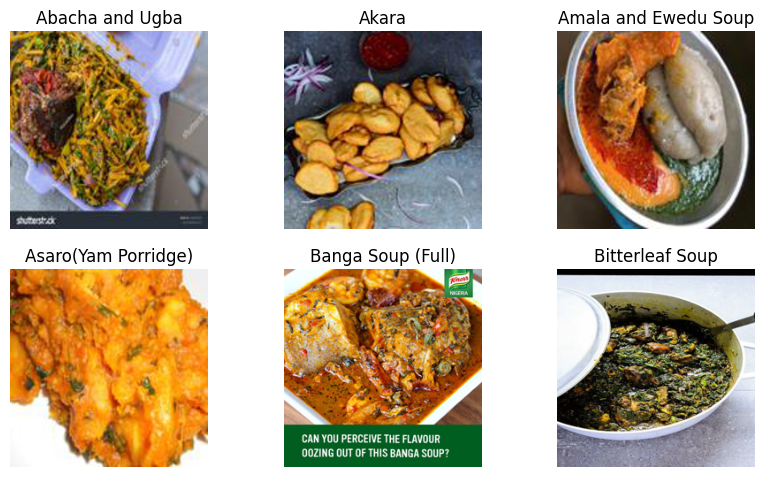

In [2]:
# Display images only if valid data exists
num_classes_to_show = 6
plt.figure(figsize=(10, num_classes_to_show * 3))

i = 0
for food, images in food_images.items():
    if len(images) == 0:
        continue  # Skip empty categories
    plt.subplot(num_classes_to_show, 3, i+1)
    plt.imshow(images[0])  # Show first image of each category
    plt.title(food)
    plt.axis('off')
    i += 1
    if i >= num_classes_to_show:
        break  # Stop after showing the desired number of classes

plt.show()

In [4]:
import pandas as pd
metadata = pd.read_csv("Nigerian Foods.csv")
metadata.head()

,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,Abacha,"African salad, utazi leaves, oil, fish",Cassava-based salad with spicy fish,Healthy,Traditional,South-East,Spicy,Affordable
1,Abacha and Ugba (Regular),"Abacha (Cassava Fufu), Ugba (Oilbean Seeds)",Shredded cassava fufu served with oilbean seeds.,Healthy,Traditional,Eastern,NaN,Affordable
2,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
3,Afang Soup (Spicy),"Afang Leaves, Water yam, Seafood","Spicy soup made with afang leaves, water yam, ...",Healthy,Traditional,Southern,Spicy,Affordable
4,Afang Soup,"Afang leaves, waterleaf, meat, fish",Nutritious soup made with wild spinach and wat...,Healthy,Traditional,South-South,Mild,Affordable


In [6]:
combined_data = []

for class_name, images in food_images.items():
    # Find metadata for this food class
    class_metadata = metadata[metadata['Food_Name'] == class_name]

    if not class_metadata.empty:
        for img in images:
            # Add ALL metadata fields along with the image
            combined_data.append({
                'Image': img,
                **class_metadata.iloc[0].to_dict()  # Merge all metadata columns
            })

# 🔹 Convert to DataFrame
combined_df = pd.DataFrame(combined_data)

In [7]:
combined_df.head()

,Image,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,"[[[187, 169, 0], [178, 158, 10], [158, 136, 35...",Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
2,"[[[196, 204, 240], [197, 204, 240], [199, 205,...",Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
3,"[[[148, 152, 125], [142, 146, 119], [131, 135,...",Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
4,"[[[84, 82, 69], [87, 85, 72], [93, 92, 77], [1...",Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable


In [8]:
combined_df.to_csv("Nja_Food_Data.csv", index=False)

In [ ]:
combined_df['Food_Name'].unique()